In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from helpers import *

In [3]:
basic_cfg_dict = {
    'repetitions': 1,
    'lstm_units': [100],
    'dense_units': [],
    'loss': 'mse',
    'start_lr': 0.05,
    'reduce_rl_patience': 20,
    'cooldown': 10,
    'stop_patience': 60,
    'kernel_initializer': 'he_uniform',  # 'glorot_uniform',#
    'n_time_steps': 10,
    'n_waypoints': 5,
}

### Overfit
With a short path (10 samples), overfir works consistently well.


Instructions for updating:
Use tf.cast instead.
X (1, 10, 12) y (1, 10, 2)
Training ...
Epoch  25 finished, lr: 5.000e-02, loss: 0.0291 ...
Epoch  50 finished, lr: 5.000e-02, loss: 0.0041 ...
Epoch  75 finished, lr: 5.000e-02, loss: 0.0006 ...
Epoch 100 finished, lr: 2.500e-02, loss: 0.0000 ...
Epoch 125 finished, lr: 1.250e-02, loss: 0.0000 ...
Epoch 150 finished, lr: 6.250e-03, loss: 0.0000 ...
Epoch 175 finished, lr: 6.250e-03, loss: 0.0000 ...
Epoch 200 finished, lr: 3.125e-03, loss: 0.0000 ...
Epoch 225 finished, lr: 1.563e-03, loss: 0.0000 ...
Epoch 250 finished, lr: 7.813e-04, loss: 0.0000 ...
Finished training Config(repetitions=1, lstm_units=[100], dense_units=[], loss='mse', start_lr=0.05, reduce_rl_patience=20, cooldown=10, stop_patience=60, n_time_steps=10, n_waypoints=5, kernel_initializer='he_uniform')
Config(repetitions=1, lstm_units=[100], dense_units=[], loss='mse', start_lr=0.05, reduce_rl_patience=20, cooldown=10, stop_patience=60, n_time_steps=10, n_waypoints=5, ker

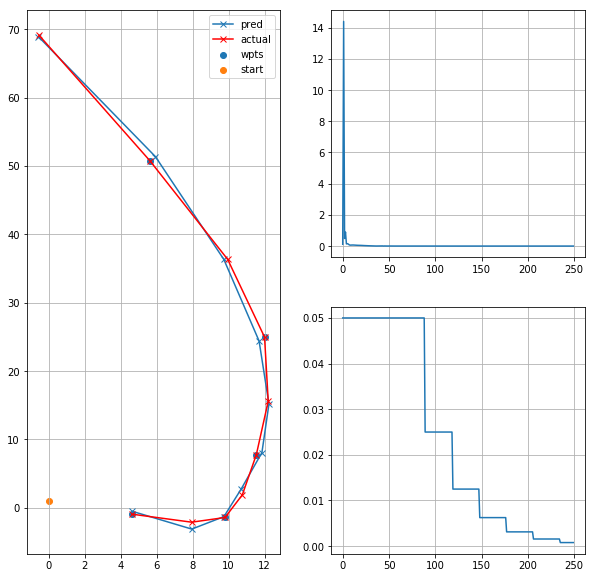

In [4]:
cfg = Config(**basic_cfg_dict)

model = get_model(cfg)
new_input, new_output, wpts, scale, bias = get_input_output_example(cfg, plot=False)
X, y = get_repeated_batch(cfg.repetitions, new_input, new_output, scale, bias)

print('Training ...')
lr_log = []
hist = model.fit(x=X, y=y, batch_size=cfg.repetitions, epochs=250, verbose=0,
                 callbacks=get_callbacks(lr_log, cfg))
print('Finished training', cfg)
%matplotlib inline
plot_fig(wpts, X, y, model, hist, cfg, scale, bias, lr_log)

With a longer paths it strugles to overfit (25 samples). But more or less it's ok.  
_NOTE_: It took several runs to have one coverging.

X (1, 25, 12) y (1, 25, 2)
Training ...
Epoch  25 finished, lr: 5.000e-02, loss: 0.0503 ...
Epoch  50 finished, lr: 5.000e-02, loss: 0.0175 ...
Epoch  75 finished, lr: 2.500e-02, loss: 0.0405 ...
Epoch 100 finished, lr: 1.250e-02, loss: 0.0286 ...
Epoch 125 finished, lr: 1.250e-02, loss: 0.0117 ...
Epoch 150 finished, lr: 1.250e-02, loss: 0.0032 ...
Epoch 175 finished, lr: 1.250e-02, loss: 0.0008 ...
Epoch 200 finished, lr: 1.250e-02, loss: 0.0003 ...
Epoch 225 finished, lr: 6.250e-03, loss: 0.0002 ...
Epoch 250 finished, lr: 3.125e-03, loss: 0.0002 ...
Finished training Config(repetitions=1, lstm_units=[100], dense_units=[], loss='mse', start_lr=0.05, reduce_rl_patience=20, cooldown=10, stop_patience=60, n_time_steps=25, n_waypoints=5, kernel_initializer='he_uniform')
Config(repetitions=1, lstm_units=[100], dense_units=[], loss='mse', start_lr=0.05, reduce_rl_patience=20, cooldown=10, stop_patience=60, n_time_steps=25, n_waypoints=5, kernel_initializer='he_uniform')
prediction (1, 25,

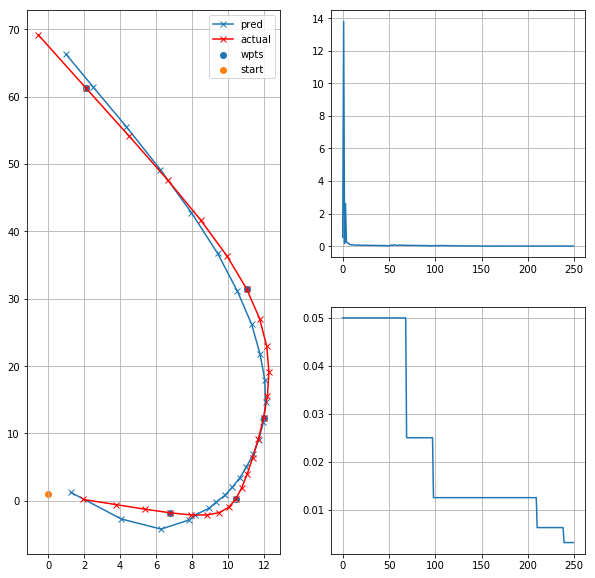

In [9]:
cfg = Config(**{**basic_cfg_dict,
                'n_time_steps':25})

model = get_model(cfg)
new_input, new_output, wpts, scale, bias = get_input_output_example(cfg, plot=False)
X, y = get_repeated_batch(cfg.repetitions, new_input, new_output, scale, bias)

print('Training ...')
lr_log = []
hist = model.fit(x=X, y=y, batch_size=cfg.repetitions, epochs=250, verbose=0,
                 callbacks=get_callbacks(lr_log, cfg))
print('Finished training', cfg)
%matplotlib inline
plot_fig(wpts, X, y, model, hist, cfg, scale, bias, lr_log)

With very long paths (100 time steps) I don't manage so far to overfit. It always finds a local minima.

X (1, 100, 12) y (1, 100, 2)
Training ...
Epoch  25 finished, lr: 2.500e-02, loss: 1.8179 ...
Epoch  50 finished, lr: 2.500e-02, loss: 0.1256 ...
Epoch  75 finished, lr: 1.250e-02, loss: 0.0513 ...
Epoch 100 finished, lr: 1.250e-02, loss: 0.0460 ...
Epoch 125 finished, lr: 1.250e-02, loss: 0.0453 ...
Epoch 150 finished, lr: 6.250e-03, loss: 0.0452 ...
Epoch 175 finished, lr: 3.125e-03, loss: 0.0452 ...
Epoch 200 finished, lr: 1.563e-03, loss: 0.0452 ...
Epoch 225 finished, lr: 1.563e-03, loss: 0.0452 ...
Epoch 250 finished, lr: 7.813e-04, loss: 0.0452 ...
Finished training Config(repetitions=1, lstm_units=[500], dense_units=[], loss='mse', start_lr=0.05, reduce_rl_patience=20, cooldown=10, stop_patience=60, n_time_steps=100, n_waypoints=5, kernel_initializer='he_uniform')
Config(repetitions=1, lstm_units=[500], dense_units=[], loss='mse', start_lr=0.05, reduce_rl_patience=20, cooldown=10, stop_patience=60, n_time_steps=100, n_waypoints=5, kernel_initializer='he_uniform')
prediction (1,

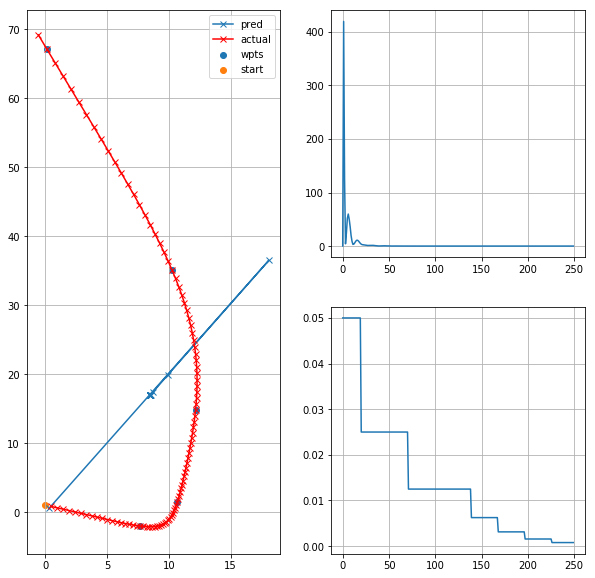

In [10]:
cfg = Config(**{**basic_cfg_dict,
                'lstm_units': [500],
                'n_time_steps':100})

model = get_model(cfg)
new_input, new_output, wpts, scale, bias = get_input_output_example(cfg, plot=False)
X, y = get_repeated_batch(cfg.repetitions, new_input, new_output, scale, bias)

print('Training ...')
lr_log = []
hist = model.fit(x=X, y=y, batch_size=cfg.repetitions, epochs=250, verbose=0,
                 callbacks=get_callbacks(lr_log, cfg))
print('Finished training', cfg)
%matplotlib inline
plot_fig(wpts, X, y, model, hist, cfg, scale, bias, lr_log)